# CNN for the american sign language alphabet testet on the digit MNIST data

#### Libraries  

In [ ]:
import os  #Directory made easier 
import tensorflow as tf #For building the neural network(Using tensorflow 2.0)
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
import numpy as np #For dataframe organisations
import pandas as pd #For dataframe organisations
from matplotlib import pyplot as plt #For plotting 
import matplotlib.pyplot as plt #For plotting 
import operator
import sys
from keras.datasets import mnist #The digit MNIST dataset 



#### Loading the data  

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Reorganize the data to fit into the neural network

In [12]:

X_train = x_train.reshape(60000, 28,28,1) #60000 pictures, which are 28*28 pixels and greyscaled 
X_test = x_test.reshape(10000, 28, 28, 1)

y_train_one_hot = to_categorical(y_train) #One hot encoding to fit into CNN 
y_test_one_hot = to_categorical(y_test)


In [ ]:
#### This network is a copy of the CNN for the sign language MNIST 

In [5]:

model = models.Sequential() #Seuential becuase I have just one input type and one output 
model.add(layers.Conv2D(64, (3, 3), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1))) #Convolutional layer
model.add(layers.MaxPooling2D((2, 2))) #Maxpooling layer
model.add(layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')) #Convolutional layer
model.add(layers.Dropout(0.3)) #Dropout layer
model.add(layers.Conv2D(32, (3, 3), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1))) #Convolutional layer
model.add(layers.MaxPooling2D((4, 4))) #Maxpooling layer
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu')) #Normal dense layer with relu activation
model.add(layers.Flatten()) #Flattining layer
model.add(layers.Dropout(0.3))
model.add(layers.Dense(26, activation='softmax')) #Normal dense layer with softmax activation


#### fitting the model to the data 

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compile model 

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test)) #50 iterations. 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.5606 - accuracy: 0.8322 - val_loss: 0.1168 - val_accuracy: 0.9692
Epoch 2/50
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.1958 - accuracy: 0.9394 - val_loss: 0.0805 - val_accuracy: 0.9771
Epoch 3/50
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1593 - accuracy: 0.9507 - val_loss: 0.0732 - val_accuracy: 0.9795
Epoch 4/50
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1390 - accuracy: 0.9561 - val_loss: 0.0610 - val_accuracy: 0.9816
Epoch 5/50
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1283 - accuracy: 0.9608 - val_loss: 0.0812 - val_accuracy: 0.9759
Epoch 6/50
60000/60000 [==============================] - 90s 1ms/sample - loss: 0.1191 - accuracy: 0.9624 - val_loss: 0.0644 - val_accuracy: 0.9807
Epoch 7/50
60000/60000 [==============================]

#### Plotting the accuracy and loss for all 50 iterations 

Text(0.5, 1.0, 'Accuracy')

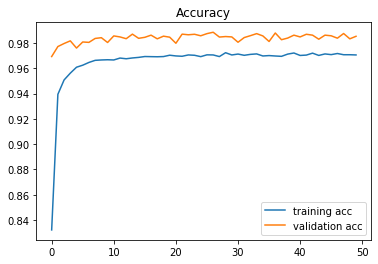

In [7]:

#Accuracy vizualized to check for overfitting 
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['training acc', 'validation acc']);
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

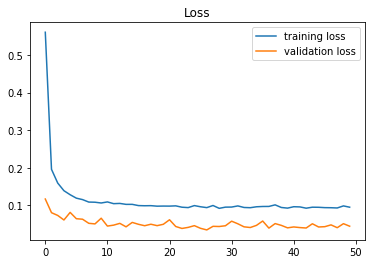

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['training loss', 'validation loss']);
plt.title('Loss')